# Matrix profiles using stumpy

# Compute distance between two time series
reference: https://stumpy.readthedocs.io/en/latest/Tutorial_AB_Joins.html matrix profile paper 1

In this section i will compare different drifter deployments using the stumpy library. I will compare the analysed time series to deployments of unanalysed time series. This will show if there are conserved patterns between deployments. In order to consistently be able to detect features using this platform there has to be some degree of similarity between the dataset

In [1]:
import stumpy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import glob as glob
from matplotlib.patches import ConnectionPatch
import matplotlib.ticker as mtick

#plt.rcParams.update({
#  "text.usetex": True,
#  "font.family": "Helvetica"
#})

"""Functions from B_series_functions"""

"""Create a time array from B series indexes"""
def time_array(start,end):
    time_s = np.linspace(0,end-start,end-start)/100#convert to seconds
    return time_s

"""find index of time in video of a given drifter deployment"""
def index_finder(cp_times,time_s,start_n):
    length = len(cp_times)
    indexes = np.zeros(length)
    for i in range(length):#find indexes in time_s of the features
        indexes[i] = (next(j for j, _ in enumerate(time_s) if np.isclose(_, cp_times[i], 0.01)))    
    indexes = indexes.astype(int) + start_n
    return indexes

def read_B_series_subfolders(path):
    # create a list of file and sub directories 
    # names in the given directory 
    subfolders = os.listdir(path)
    file_list = []

    # Iterate over all the entries
    for names in subfolders:
        # Create full path
        fullPath = os.path.join(path, names)
        # If entry is a directory then get the list of files in this directory 
        temp_path = fullPath#for glob
        if os.path.isdir(fullPath):
            file_list = file_list + read_B_series_subfolders(fullPath)   
        else:
            txt_files = glob.glob(path + "/*.csv")#only read txt files
            if (txt_files != []):
                file_list.append(txt_files)
    return file_list

%matplotlib notebook

# Load data from csv

In [2]:
""""""
####################
#Cross section A14
####################
A14_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/A14"
A14B13 = pd.read_csv(A14_path+"/B13.csv",names = ["time s/100","pressure"],header = 0)
A14B17 = pd.read_csv(A14_path+"/B17.csv",names = ["time s/100","pressure"],header = 0)
A14B56 = pd.read_csv(A14_path+"/B56.csv",names = ["time s/100","pressure"],header = 0)
A14B78 = pd.read_csv(A14_path+"/B78.csv",names = ["time s/100","pressure"],header = 0)
A14B82 = pd.read_csv(A14_path+"/B82.csv",names = ["time s/100","pressure"],header = 0)
A14B84 = pd.read_csv(A14_path+"/B84.csv",names = ["time s/100","pressure"],header = 0)
A14B85 = pd.read_csv(A14_path+"/B85.csv",names = ["time s/100","pressure"],header = 0)

#cut out when drifter lying still
A14B13 = A14B13.iloc[6000:18050]
A14B17 = A14B17.iloc[10660:23800]
A14B56 = A14B56.iloc[12500:26000]#[12500:26200]
A14B78 = A14B78.iloc[20250:33500]
A14B82 = A14B82.iloc[23000:36500]
A14B84 = A14B84.iloc[26400:-1]
A14B85 = A14B85.iloc[26600:40200]
#A14B85['pressure'].plot(figsize = (10,7))

#load exel sheet of drifter observations
B56_A14_excel_sheet_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/drifter_videos/2020/Video_features_A14_B56_reanalysed.xlsx"
B56_A14_SS = pd.read_excel(B56_A14_excel_sheet_path,header = 8)
B56_A14_SS["Middle_t"] = B56_A14_SS["Stop_corr"]-(B56_A14_SS["Stop_corr"]-B56_A14_SS["Start_corr"])/2
A14steps = B56_A14_SS[B56_A14_SS["Feature id"] == 1].reset_index(drop=True)
A14other = B56_A14_SS[B56_A14_SS["Feature id"] == 2].reset_index(drop=True)
time_A14 = time_array(12500,26500)
A14_HF_idx = index_finder(B56_A14_SS["Middle_t"],time_A14,12500)-12500
steps_idx = index_finder(A14steps["Middle_t"],time_A14,12500)-12500
#A14_HF_stop_idx = index_finder(B56_A14_HF_stop,time_A14,start)-start


####################
#Cross section A8
####################
A8_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/A8"
A8B10 = pd.read_csv(A8_path+"/B10.csv",names = ["time s/100","pressure"],header = 0)
A8B13 = pd.read_csv(A8_path+"/B13.csv",names = ["time s/100","pressure"],header = 0)
A8B33 = pd.read_csv(A8_path+"/B33.csv",names = ["time s/100","pressure"],header = 0)
A8B55 = pd.read_csv(A8_path+"/B55.csv",names = ["time s/100","pressure"],header = 0)
A8B65 = pd.read_csv(A8_path+"/B65.csv",names = ["time s/100","pressure"],header = 0)
A8B74 = pd.read_csv(A8_path+"/B74.csv",names = ["time s/100","pressure"],header = 0)
A8B75 = pd.read_csv(A8_path+"/B75.csv",names = ["time s/100","pressure"],header = 0)
A8B80 = pd.read_csv(A8_path+"/B80.csv",names = ["time s/100","pressure"],header = 0)
A8B84 = pd.read_csv(A8_path+"/B84.csv",names = ["time s/100","pressure"],header = 0)
A8B85 = pd.read_csv(A8_path+"/B85.csv",names = ["time s/100","pressure"],header = 0)
A8B86 = pd.read_csv(A8_path+"/B86.csv",names = ["time s/100","pressure"],header = 0)

A8B80 = A8B80.iloc[15795:19699]
A8B10 = A8B10.iloc[5704:10144]
A8B13 = A8B13.iloc[6600:10428]
A8B33 = A8B33.iloc[8207:12000]
A8B55 = A8B55.iloc[10123:13754]
A8B65 = A8B65.iloc[10988:14720]#This sensor might be faulty
A8B74 = A8B74.iloc[11687:15677]
A8B75 = A8B75.iloc[14682:19004]
A8B84 = A8B84.iloc[18480:22787]
A8B85 = A8B85.iloc[19545:23467]
A8B86 = A8B86.iloc[20255:24166]

#load exel sheet of drifter observations
B80_A8_excel_sheet_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/drifter_videos/2020/Video_features_A8_B80.xlsx"
B80_A8_SS = pd.read_excel(B80_A8_excel_sheet_path,header = 3)
A8_steps = B80_A8_SS[B80_A8_SS["Feature id"] == 1].reset_index(drop=True)
A8_start = 15784
A8_end = 19699
time_A8 = time_array(A8_start,A8_end)
A8_HF_idx = index_finder(B80_A8_SS["Deployment_time"],time_A8,A8_start)-A8_start
A8_steps_idx = index_finder(A8_steps["Deployment_time"],time_A8,A8_start)-A8_start

In [3]:
m = 250
"""A14"""

#B13
B13_B78_mp = stumpy.stump(T_A = A14B13['pressure'].values,m = m,T_B = A14B78['pressure'].values,ignore_trivial = False)
B13_B82_mp = stumpy.stump(T_A = A14B13['pressure'].values,m = m,T_B = A14B82['pressure'].values,ignore_trivial = False)
B13_B84_mp = stumpy.stump(T_A = A14B13['pressure'].values,m = m,T_B = A14B84['pressure'].values,ignore_trivial = False)
B13_B85_mp = stumpy.stump(T_A = A14B13['pressure'].values,m = m,T_B = A14B85['pressure'].values,ignore_trivial = False)

#B17
B17_B13_mp = stumpy.stump(T_A = A14B17['pressure'].values,m = m,T_B = A14B13['pressure'].values,ignore_trivial = False)
B17_B78_mp = stumpy.stump(T_A = A14B17['pressure'].values,m = m,T_B = A14B78['pressure'].values,ignore_trivial = False)
B17_B82_mp = stumpy.stump(T_A = A14B17['pressure'].values,m = m,T_B = A14B82['pressure'].values,ignore_trivial = False)
B17_B84_mp = stumpy.stump(T_A = A14B17['pressure'].values,m = m,T_B = A14B84['pressure'].values,ignore_trivial = False)
B17_B85_mp = stumpy.stump(T_A = A14B17['pressure'].values,m = m,T_B = A14B85['pressure'].values,ignore_trivial = False)

#B56
B56_B17_mp = stumpy.stump(T_A = A14B56['pressure'].values,m = m,T_B = A14B17['pressure'].values,ignore_trivial = False)
B56_B13_mp = stumpy.stump(T_A = A14B56['pressure'].values,m = m,T_B = A14B13['pressure'].values,ignore_trivial = False)
B56_B78_mp = stumpy.stump(T_A = A14B56['pressure'].values,m = m,T_B = A14B78['pressure'].values,ignore_trivial = False)
B56_B82_mp = stumpy.stump(T_A = A14B56['pressure'].values,m = m,T_B = A14B82['pressure'].values,ignore_trivial = False)
B56_B84_mp = stumpy.stump(T_A = A14B56['pressure'].values,m = m,T_B = A14B84['pressure'].values,ignore_trivial = False)
B56_B85_mp = stumpy.stump(T_A = A14B56['pressure'].values,m = m,T_B = A14B85['pressure'].values,ignore_trivial = False)

#B78
B78_B82_mp = stumpy.stump(T_A = A14B78['pressure'].values,m = m,T_B = A14B82['pressure'].values,ignore_trivial = False)
B78_B84_mp = stumpy.stump(T_A = A14B78['pressure'].values,m = m,T_B = A14B84['pressure'].values,ignore_trivial = False)
B78_B85_mp = stumpy.stump(T_A = A14B78['pressure'].values,m = m,T_B = A14B85['pressure'].values,ignore_trivial = False)

#B82
B82_B84_mp = stumpy.stump(T_A = A14B82['pressure'].values,m = m,T_B = A14B84['pressure'].values,ignore_trivial = False)
B82_B85_mp = stumpy.stump(T_A = A14B82['pressure'].values,m = m,T_B = A14B85['pressure'].values,ignore_trivial = False)

#B84
B84_B85_mp = stumpy.stump(T_A = A14B84['pressure'].values,m = m,T_B = A14B85['pressure'].values,ignore_trivial = False)

"""A8"""
B80_B10_mp = stumpy.stump(T_A = A8B80['pressure'].values,m = m,T_B = A8B10['pressure'].values,ignore_trivial = False)
B80_B13_mp = stumpy.stump(T_A = A8B80['pressure'].values,m = m,T_B = A8B13['pressure'].values,ignore_trivial = False)
B80_B33_mp = stumpy.stump(T_A = A8B80['pressure'].values,m = m,T_B = A8B33['pressure'].values,ignore_trivial = False)
B80_B55_mp = stumpy.stump(T_A = A8B80['pressure'].values,m = m,T_B = A8B55['pressure'].values,ignore_trivial = False)
B80_B65_mp = stumpy.stump(T_A = A8B80['pressure'].values,m = m,T_B = A8B65['pressure'].values,ignore_trivial = False)
B80_B74_mp = stumpy.stump(T_A = A8B80['pressure'].values,m = m,T_B = A8B74['pressure'].values,ignore_trivial = False)
B80_B75_mp = stumpy.stump(T_A = A8B80['pressure'].values,m = m,T_B = A8B75['pressure'].values,ignore_trivial = False)
B80_B84_mp = stumpy.stump(T_A = A8B80['pressure'].values,m = m,T_B = A8B84['pressure'].values,ignore_trivial = False)
B80_B85_mp = stumpy.stump(T_A = A8B80['pressure'].values,m = m,T_B = A8B85['pressure'].values,ignore_trivial = False)
B80_B86_mp = stumpy.stump(T_A = A8B80['pressure'].values,m = m,T_B = A8B86['pressure'].values,ignore_trivial = False)


OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


# Compare different A14 deployments 

<IPython.core.display.Javascript object>


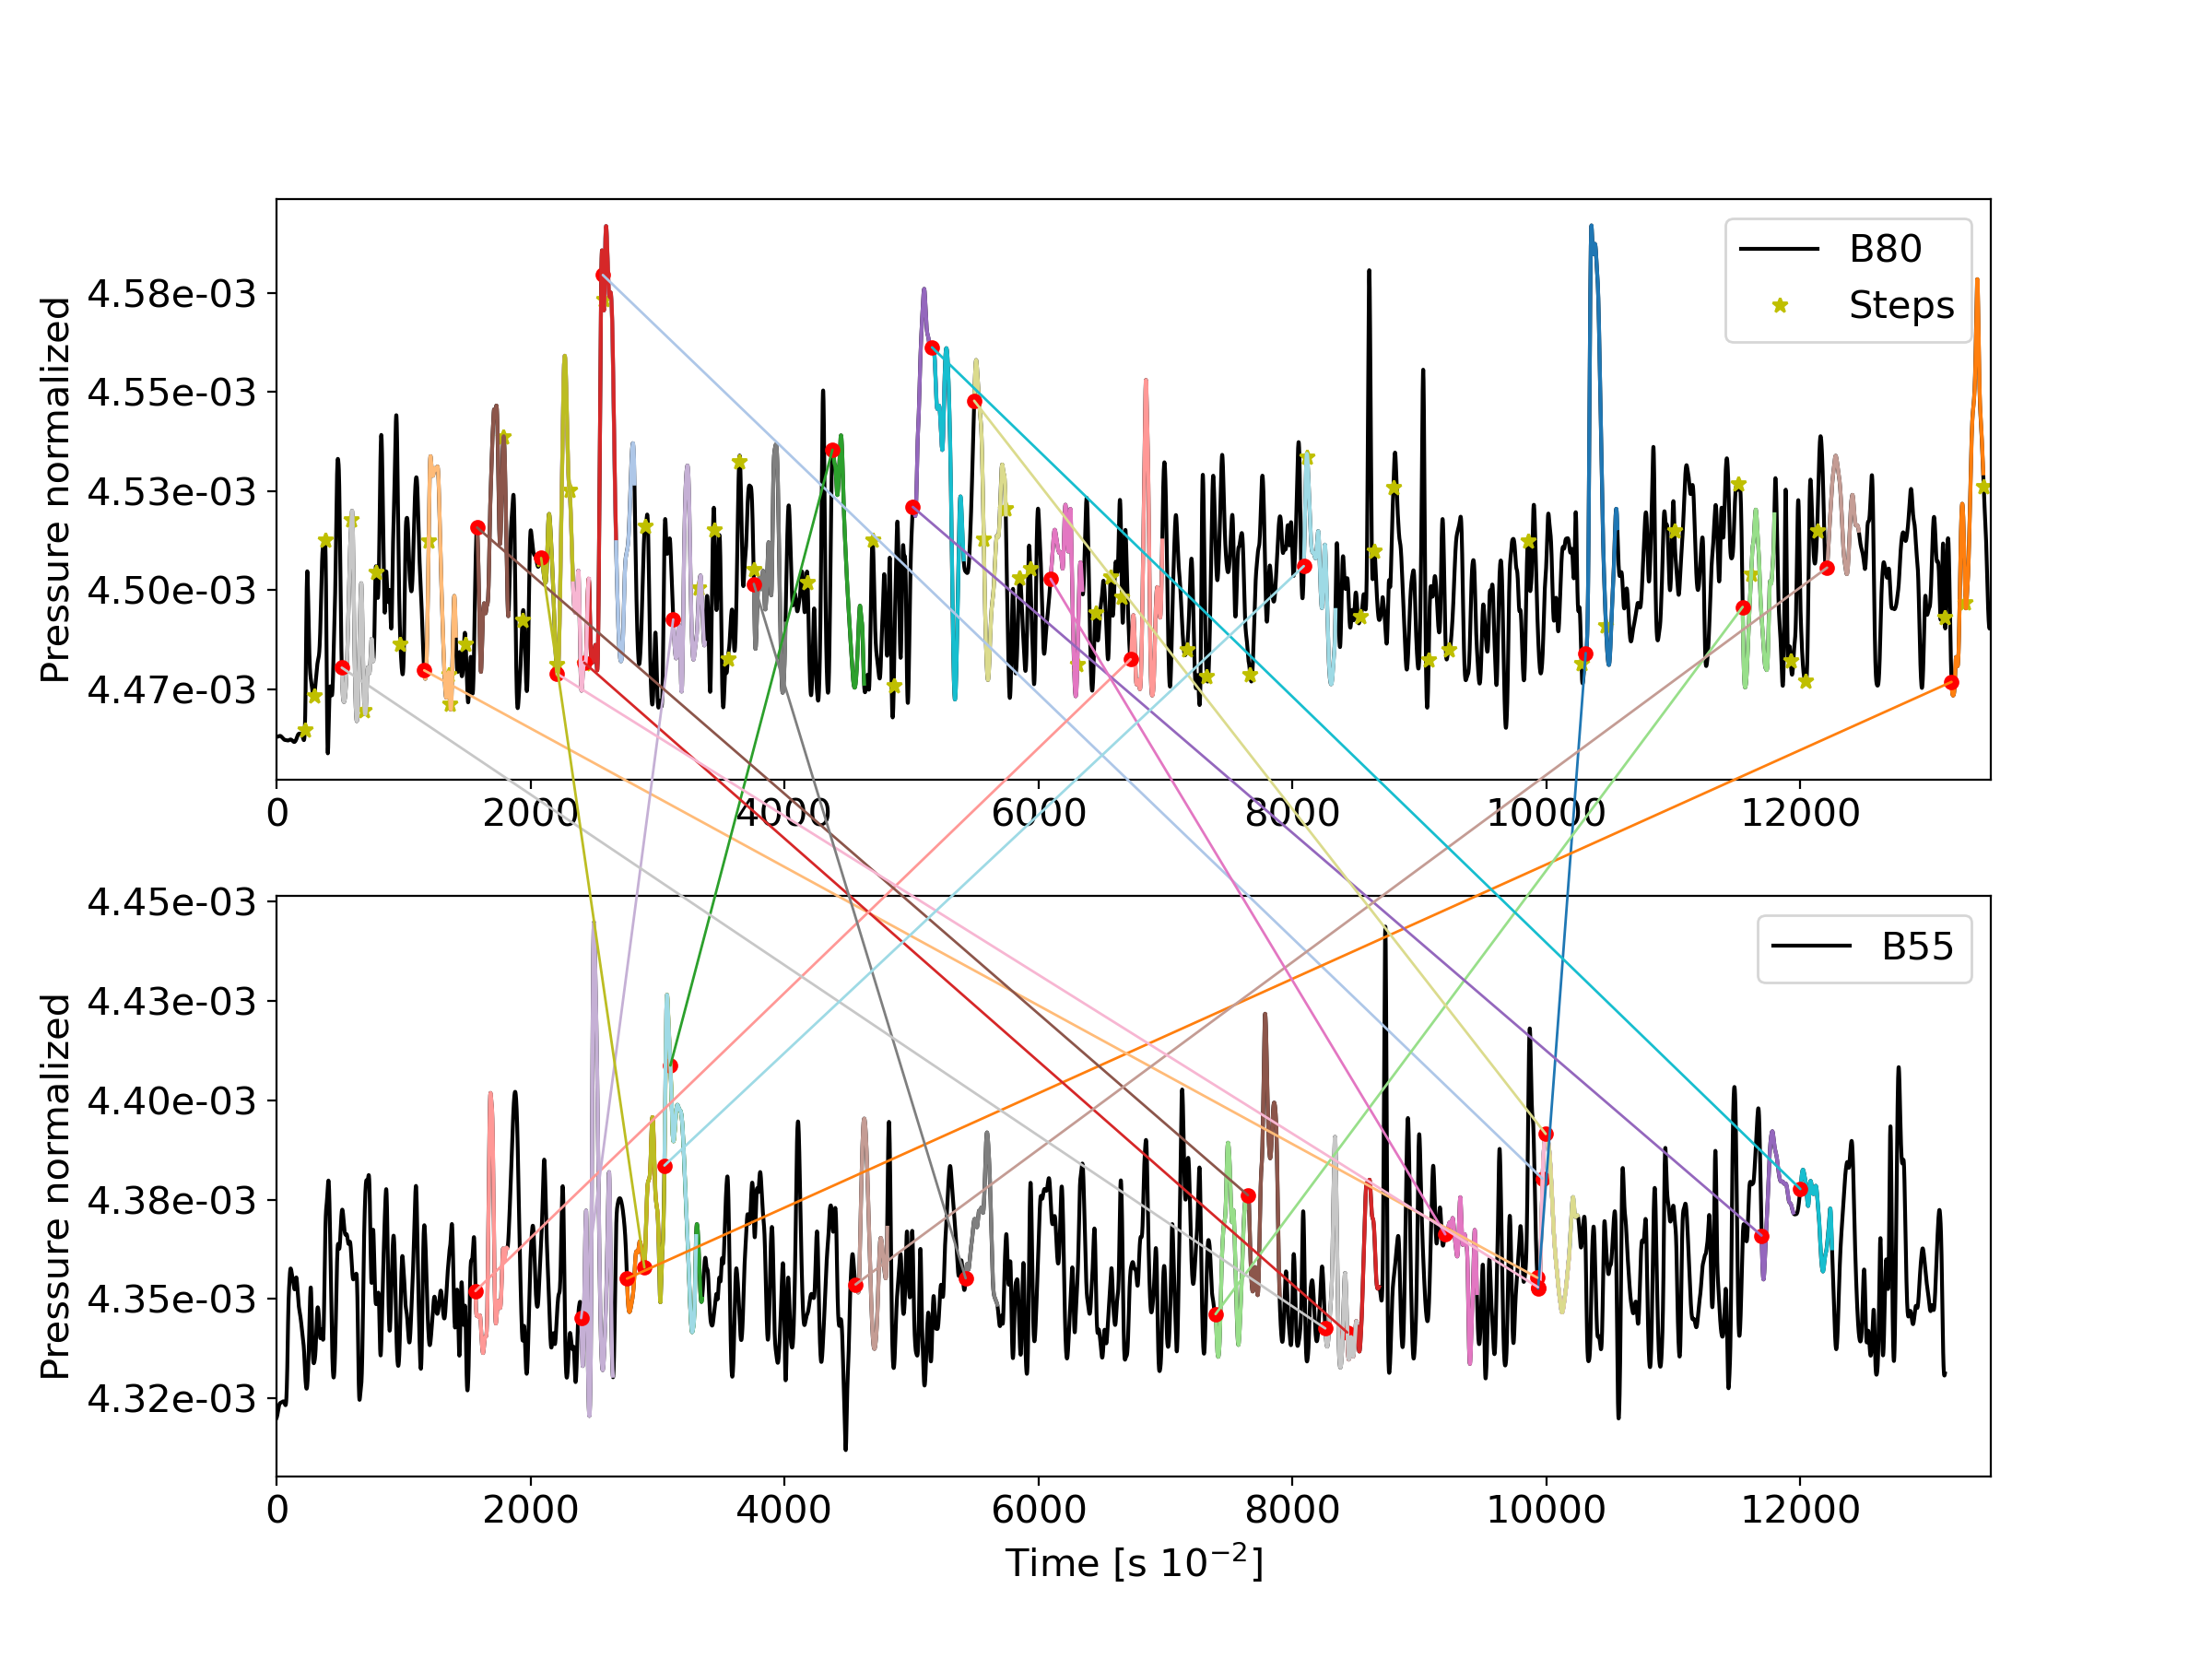

/var/folders/_k/bgs9c7fx4098w4vgtc325b8w0000gn/T/ipykernel_971/262799730.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if features != "off":


In [4]:
%matplotlib notebook

def plot_motifs(mp,TA,TB,m,features="off",k=5):
    #k how many best matches
    mp_sort_idx = np.argpartition(mp[:,0], len(mp)-1)#sort indices by size
    top_match = np.zeros(k)#save the k best matches
    top_match[0] = mp_sort_idx[0]
    n = 1
    for i in range(1,len(mp_sort_idx)):
        if n < k:
            if np.any(abs(mp_sort_idx[i]-top_match) < m/2):#only find matches that contain other features
                pass
            else:
                top_match[n] = mp_sort_idx[i]
                n += 1
    #TA_motif_idx = top_match#mp[:, 0].argmin()


    #TB_motif_idx = mp[TA_motif_idx, 1]
    
    color = plt.cm.tab20(np.linspace(0, 1, k))
    
    plt.rcParams.update({'font.size': 15})
    fig,[ax1,ax2] = plt.subplots(nrows=2,figsize = (12,9))
    ax1.plot(TA,label = "B80",c="black")
    ax2.plot(TB,label="B55",c="black")
    
    if features != "off": 
        ax1.plot(features,TA[features],marker = "*",c="y",ls = "None",label="Steps")
    
    for i in range(k):
        TA_motif_idx = int(top_match[i])
        TB_motif_idx = mp[TA_motif_idx, 1]
        ax1.plot(np.linspace(TA_motif_idx ,TA_motif_idx + m,m),TA[TA_motif_idx : TA_motif_idx + m],c = color[i])
        ax2.plot(np.linspace(TB_motif_idx ,TB_motif_idx + m,m),TB[TB_motif_idx : TB_motif_idx + m],c = color[i]) 
        
        TA_xy = (TA_motif_idx,TA[TA_motif_idx])
        TB_xy = (TB_motif_idx,TB[TB_motif_idx])
        
        #plot lines between subplots
        con = ConnectionPatch(xyA=TA_xy, xyB=TB_xy, coordsA="data", coordsB="data",
                          axesA=ax1, axesB=ax2, color=color[i])
        
        ax1.plot(TA_motif_idx,TA[TA_motif_idx],'o',markersize=5,c="r")
        ax2.plot(TB_motif_idx,TB[TB_motif_idx],'o',markersize=5,c="r")
        fig.add_artist(con)
        
    #ax1.set_xlabel('Time')
    ax1.set_ylabel('Pressure normalized')
    ax2.set_ylabel('Pressure normalized')
    
    if len(TA)<len(TB):
        ax1.set_xlim(0,len(TB))
        ax2.set_xlim(0,len(TB))
    else:
        ax1.set_xlim(0,len(TA))
        ax2.set_xlim(0,len(TA))
    ax2.set_xlabel("Time [s $10^{-2}$]")
    ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))


    ax1.legend()
    ax2.legend()
    #plt.savefig('A8_example.eps', format='eps')
    plt.show()

#B56  
plot_motifs(B56_B17_mp,A14B56["pressure"].values,A14B17["pressure"].values,m,steps_idx,k=20)
#plot_motifs(B56_B13_mp,A14B56["pressure"].values,A14B13["pressure"].values,m,steps_idx,k=20)
#plot_motifs(B56_B78_mp,A14B56["pressure"].values,A14B78["pressure"].values,m,steps_idx,k=20)
#plot_motifs(B56_B82_mp,A14B56["pressure"].values,A14B82["pressure"].values,m,steps_idx,k=20)
#plot_motifs(B56_B84_mp,A14B56["pressure"].values,A14B84["pressure"].values,m,steps_idx,k=20)
#plot_motifs(B56_B85_mp,A14B56["pressure"].values,A14B85["pressure"].values,m,steps_idx,k=20)

#B17
#plot_motifs(B17_B13_mp,A14B17["pressure"].values,A14B13["pressure"].values,m,k=20)
#plot_motifs(B17_B78_mp,A14B17["pressure"].values,A14B78["pressure"].values,m,k=20)
#plot_motifs(B17_B82_mp,A14B17["pressure"].values,A14B82["pressure"].values,m,k=20)
#plot_motifs(B17_B84_mp,A14B17["pressure"].values,A14B84["pressure"].values,m,k=20)
#plot_motifs(B17_B85_mp,A14B17["pressure"].values,A14B85["pressure"].values,m,k=20)

#B13
#plot_motifs(B13_B78_mp,A14B17["pressure"].values,A14B78["pressure"].values,m,k=20)
#plot_motifs(B13_B82_mp,A14B17["pressure"].values,A14B82["pressure"].values,m,k=20)
#plot_motifs(B13_B84_mp,A14B17["pressure"].values,A14B84["pressure"].values,m,k=20)
#plot_motifs(B13_B85_mp,A14B17["pressure"].values,A14B85["pressure"].values,m,k=20)

#B78
#plot_motifs(B78_B82_mp,A14B17["pressure"].values,A14B82["pressure"].values,m,k=20)
#plot_motifs(B78_B84_mp,A14B17["pressure"].values,A14B84["pressure"].values,m,k=20)
#plot_motifs(B78_B85_mp,A14B17["pressure"].values,A14B85["pressure"].values,m,k=20)

#B82
#plot_motifs(B82_B84_mp,A14B17["pressure"].values,A14B84["pressure"].values,m,k=20)
#plot_motifs(B82_B85_mp,A14B17["pressure"].values,A14B85["pressure"].values,m,k=20)

#B84
#plot_motifs(B84_B85_mp,A14B17["pressure"].values,A14B85["pressure"].values,m,k=20)

#A8
#plot_motifs(B80_B10_mp,A8B80["pressure"].values,A8B10["pressure"].values,m,A8_steps_idx,k=13)
#plot_motifs(B80_B13_mp,A8B80["pressure"].values,A8B13["pressure"].values,m,A8_steps_idx,k=13)
#plot_motifs(B80_B33_mp,A8B80["pressure"].values,A8B33["pressure"].values,m,A8_steps_idx,k=13)
#plot_motifs(B80_B55_mp,A8B80["pressure"].values,A8B55["pressure"].values,m,A8_steps_idx,k=13)
#plot_motifs(B80_B65_mp,A8B80["pressure"].values,A8B65["pressure"].values,m,A8_steps_idx,k=13)
#plot_motifs(B80_B74_mp,A8B80["pressure"].values,A8B74["pressure"].values,m,A8_steps_idx,k=13)
#plot_motifs(B80_B75_mp,A8B80["pressure"].values,A8B75["pressure"].values,m,A8_steps_idx,k=13)
#plot_motifs(B80_B84_mp,A8B80["pressure"].values,A8B84["pressure"].values,m,A8_steps_idx,k=13)
#plot_motifs(B80_B85_mp,A8B80["pressure"].values,A8B85["pressure"].values,m,A8_steps_idx,k=13)
#plot_motifs(B80_B86_mp,A8B80["pressure"].values,A8B86["pressure"].values,m,A8_steps_idx,k=13)



